In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
import numpy as np
from matplotlib.lines import Line2D
# plt.rcParams["figure.figsize"] = (20,20)
# plt.rcParams.update({'font.size': 28})

plt.rcParams['text.usetex'] = True

In [2]:
def format_scientific_notation_with_superscript(value):
    # Dictionary to map digits to their superscript counterparts
    superscript_map = {
        '0': '⁰',
        '1': '¹',
        '2': '²',
        '3': '³',
        '4': '⁴',
        '5': '⁵',
        '6': '⁶',
        '7': '⁷',
        '8': '⁸',
        '9': '⁹',
        '-': '⁻'
    }

    # Convert to scientific notation
    scientific_notation = f"{value:.1e}"
    # Split the scientific notation string into mantissa and exponent parts
    mantissa, exponent = scientific_notation.split('e')
    # Format the exponent to remove the leading + and convert it to superscript
    exponent = exponent.replace('+', '')
    exponent = str(int(exponent))
    superscript_exponent = ''.join(superscript_map[char] for char in exponent)
    return fr"${mantissa}\times10^{{ {exponent} }}$"
    # return r'$\times$'

In [3]:

# "results/frontera-scaling-updated-ghost-dist-filter___2024-05-30__17-46-26.json"

# input_file_name = 'results/frontera-scaling-front_bfs-large-meshes___2024-06-19__16-10-43.json'

input_file_name = 'results/frontera-scaling-overlapped-com___2024-06-20__19-27-55.json'     # current best

# input_file_name = 'results/frontera-scaling-front_bfs___2024-06-06__19-42-12.json'   

prev_file = 'results/frontera-scaling-front_bfs___2024-06-06__19-42-12.json'


# prev_file = "results/frontera-scaling-front_bfs___2024-05-30__19-10-01.json"

# 'results/frontera-scaling-front_bfs___2024-06-06__19-42-12.json'     # last shown to Hari


# prev_file = "results/frontera-scaling-std-bfs-dist-filter-changed-ghost-types-32-32-16___2024-05-28__18-33-13.json"     



In [4]:
df = pd.read_json(input_file_name, orient='records',lines=True)
# print(df)
# df = df[df['run_idx'] == 2] 
df.reset_index(drop=True, inplace=True)
mesh_count = df['mesh_idx'].max() + 1
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']




df_prev = pd.read_json(prev_file, orient='records',lines=True)

df_prev.reset_index(drop=True, inplace=True)

In [5]:
# getting aggregated data

df_all = df.copy()

df = df[['mesh_idx','n','np','BFS_time','METIS_time']]

df = df.groupby(['mesh_idx','np'])[['n','BFS_time','METIS_time']].min().reset_index()           # min or avg




df_prev_all = df_prev.copy()

df_prev = df_prev[['mesh_idx','n','np','BFS_time','METIS_time']]

df_prev = df_prev.groupby(['mesh_idx','np'])[['n','BFS_time','METIS_time']].min().reset_index()           # min or avg

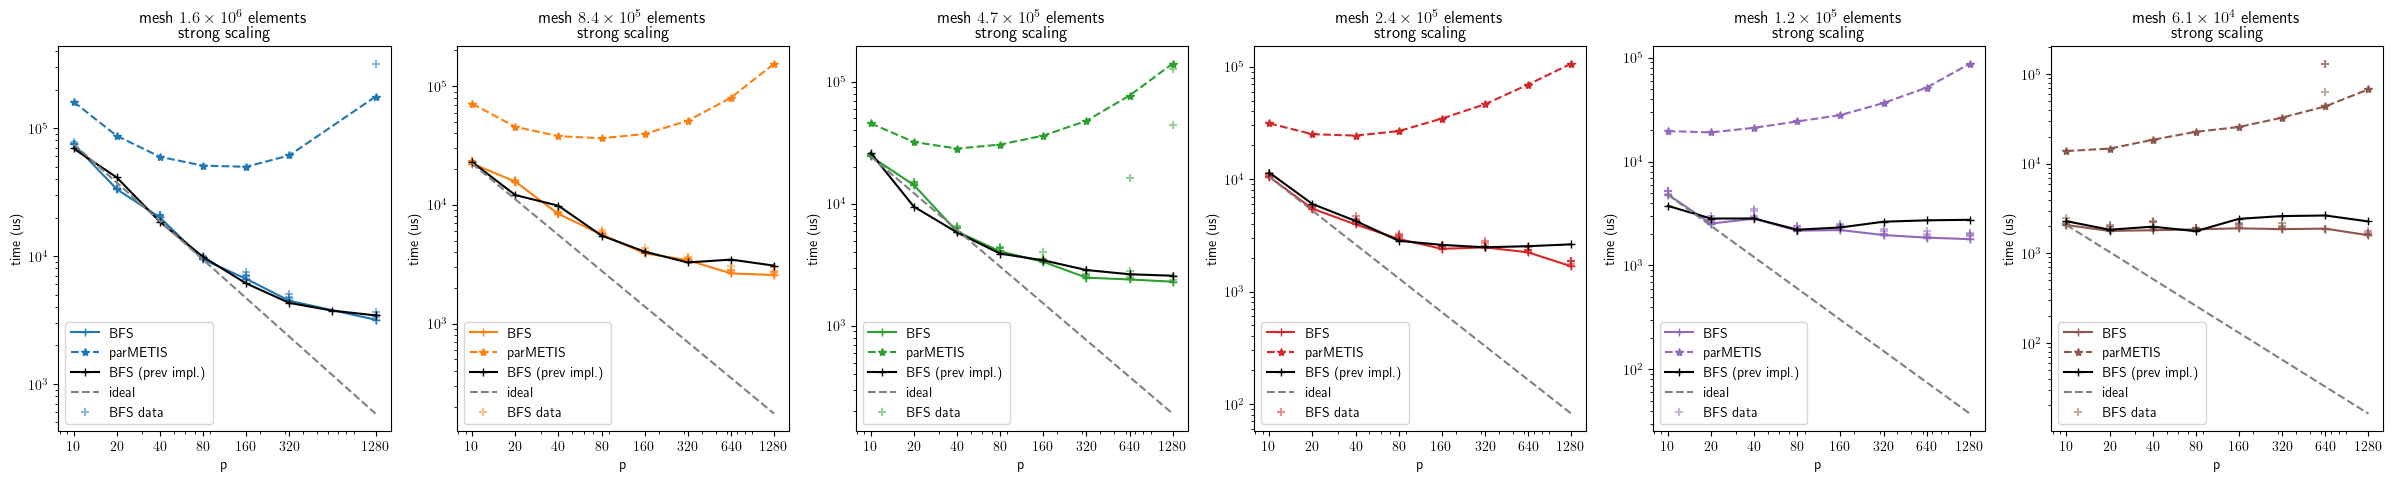

In [6]:

# plt.figure()

fig, axs = plt.subplots(1, mesh_count, figsize=(5*mesh_count, 5)) 
# fig, axs = plt.subplots(1, mesh_count, figsize=(5*mesh_count, 5)) 

if not isinstance(axs, np.ndarray):
    axs = [axs]

for mesh_idx in range(mesh_count):
    # if(mesh_idx == 1):
    #     continue

    filtered_df = df[df['mesh_idx'] == mesh_idx].copy()
    filtered_df.reset_index(drop=True, inplace=True)
    element_count = filtered_df.loc[0, 'n']


    filtered_df_prev = df_prev[df_prev['mesh_idx'] == mesh_idx].copy()
    filtered_df_prev.reset_index(drop=True, inplace=True)
    


    # plt.figure()
    axs[mesh_idx].plot(filtered_df['np'], filtered_df['BFS_time'],color=colors[mesh_idx], label=f"BFS", marker='+',)
    axs[mesh_idx].plot(filtered_df['np'], filtered_df['METIS_time'],color=colors[mesh_idx], label=f"parMETIS", marker='*', linestyle='--')
    
    axs[mesh_idx].plot(filtered_df_prev['np'], filtered_df_prev['BFS_time'],color='black', label=f"BFS (prev impl.)", marker='+',)


    # plotting ideal scaling for BFS
    min_proc_count = filtered_df['np'].min()
    min_proc_BFS_time = filtered_df[filtered_df['np'] == min_proc_count].loc[0,'BFS_time']
    filtered_df['BFS_time_ideal_scaling'] = min_proc_BFS_time * (min_proc_count/filtered_df['np'])

    axs[mesh_idx].plot(filtered_df['np'], filtered_df['BFS_time_ideal_scaling'],color='grey', label=f"ideal", marker='', linestyle='--')


    df_all_filtered = df_all[df_all['mesh_idx'] == mesh_idx]




    axs[mesh_idx].scatter(df_all_filtered['np'], df_all_filtered['BFS_time'], color=colors[mesh_idx], marker='+', alpha=0.5, label='BFS data')
    # axs[mesh_idx].scatter(df_all_filtered['np'], df_all_filtered['METIS_time'], color=colors[mesh_idx], marker='*', alpha=0.5, label='parMETIS data')



    
    axs[mesh_idx].set_xscale('log')
    axs[mesh_idx].set_yscale('log')
    axs[mesh_idx].set_xticks(filtered_df['np'])
    axs[mesh_idx].get_xaxis().set_major_formatter(ScalarFormatter())
    axs[mesh_idx].set_title("mesh   "+   format_scientific_notation_with_superscript(element_count)+ " elements\nstrong scaling")
    axs[mesh_idx].set_xlabel('p')
    axs[mesh_idx].set_ylabel('time (us)')

    # ## Annotate each point with its y value
    # for i in range(len(filtered_df)):
    #     axs[mesh_idx].annotate(format_scientific_notation_with_superscript(filtered_df["BFS_time"][i]), (filtered_df['np'][i], filtered_df['BFS_time'][i]), textcoords="offset points", xytext=(0,5), ha='center')
    #     axs[mesh_idx].annotate(format_scientific_notation_with_superscript(filtered_df["METIS_time"][i]), (filtered_df['np'][i], filtered_df['METIS_time'][i]), textcoords="offset points", xytext=(0,5), ha='center')



    axs[mesh_idx].legend()

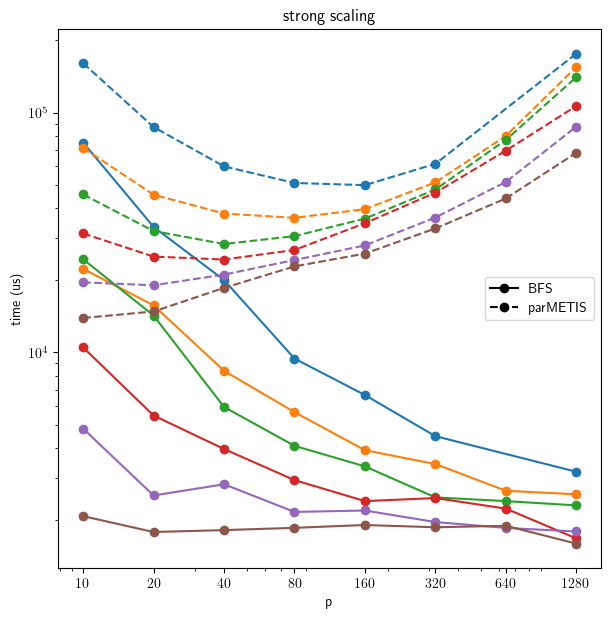

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(7, 7))  
for mesh_idx in range(mesh_count):
    filtered_df = df[df['mesh_idx'] == mesh_idx]
    filtered_df.reset_index(drop=True, inplace=True)
    element_count = filtered_df.loc[0, 'n']
    # plt.figure()
    axs.plot(filtered_df['np'], filtered_df['BFS_time'],color=colors[mesh_idx], label=f"BFS", marker='o',)
    axs.plot(filtered_df['np'], filtered_df['METIS_time'],color=colors[mesh_idx], label=f"parMETIS", marker='o', linestyle='--')
legend_elements = [
    Line2D([0], [0], color='black', label='BFS',marker='o'),
    Line2D([0], [0], color='black', label='parMETIS',marker='o', linestyle='--')
]

axs.set_xscale('log')
axs.set_yscale('log')
plt.xticks(filtered_df['np'])
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
axs.set_title(f"strong scaling")
axs.set_xlabel('p')
axs.set_ylabel('time (us)')
axs.legend(handles=legend_elements)
# axs.legend()

     np        n  BFS_time  BFS_time_adjusted  METIS_time  METIS_time_adjusted
0  1280  1598423      3179        3887.806960      176211        215499.953502
1   640   838216      2648        3087.720091       79935         93208.801168
2   320   473265      2484        2565.033831       47797         49356.248799
3   160   242437      2398        2416.941704       34572         34845.082822
4    80   124322      2161        2123.697624       24278         23858.922218
5    40    61088      1815        1815.000000       18582         18582.000000


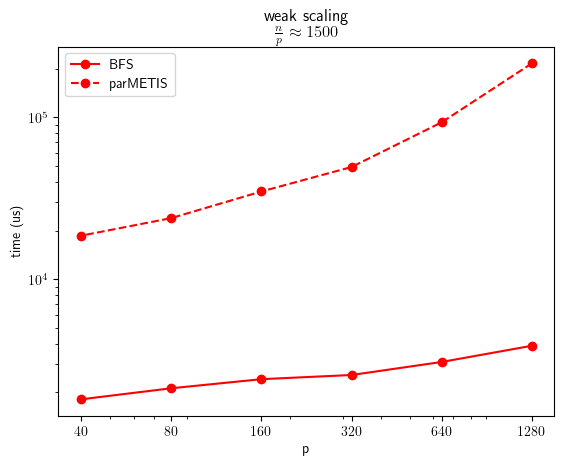

In [8]:
# Define conditions
conditions = [
    (df['mesh_idx'] == 0) & (df['np'] == 1280),
    (df['mesh_idx'] == 1) & (df['np'] == 640),
    (df['mesh_idx'] == 2) & (df['np'] == 320),
    (df['mesh_idx'] == 3) & (df['np'] == 160),
    (df['mesh_idx'] == 4) & (df['np'] == 80),
    (df['mesh_idx'] == 5) & (df['np'] == 40),


]



# Filter the DataFrame for each condition
filtered_dfs = [df[cond] for cond in conditions]
filtered_df = pd.concat(filtered_dfs)

# print(filtered_df)
filtered_df.reset_index(drop=True, inplace=True)
weak_scaling_adjust_factor = filtered_df.loc[5, 'n']/ filtered_df.loc[5, 'np']
# print(weak_scaling_adjust_factor)
filtered_df['BFS_time_adjusted'] = filtered_df['BFS_time'] / ((filtered_df['n']/filtered_df['np']) / weak_scaling_adjust_factor)
filtered_df['METIS_time_adjusted'] = filtered_df['METIS_time'] / ((filtered_df['n']/filtered_df['np']) / weak_scaling_adjust_factor)
print(filtered_df[['np', 'n', 'BFS_time', 'BFS_time_adjusted','METIS_time', 'METIS_time_adjusted']])

plt.plot(filtered_df['np'], filtered_df['BFS_time_adjusted'],color='red', label=f"BFS", marker='o',)
plt.plot(filtered_df['np'], filtered_df['METIS_time_adjusted'],color='red', label=f"parMETIS", marker='o', linestyle='--')



plt.xscale('log')
plt.yscale('log')

plt.xticks(filtered_df['np'])
plt.gca().xaxis.set_major_formatter(ScalarFormatter())

plt.xlabel('p')
plt.ylabel('time (us)')
plt.title('weak scaling \n' r' $\frac{n}{p} \approx 1500$ ')
plt.legend()
plt.show()

# print(list(filtered_df['mesh_file']))